# Renormalizing S-parameters 

This example demonstrates how to use skrf to renormalize a Network's s-parameters to new port impedances. Although trivial, this example creates a matched load in 50ohms and then re-normalizes to a  25ohm environment, producing a reflection coefficient of 1/3.

## Ok lets do it

In [1]:
# this is just for plotting junk 
kw = dict(draw_labels=True, marker = 'o', markersize = 10)

Create a one-port ideal match Network, (using the premade media class wr10 as a dummy)

In [2]:
import skrf as rf
rf.stylely()
match_at_50 = rf.wr10.match()

Note that the z0 for this Network defaults to a constant 50ohm

In [3]:
match_at_50

1-Port Network: '',  75-110 GHz, 1001 pts, z0=[ 50.+0.j]

Plotting its reflection coefficient on the smith chart, shows its a match

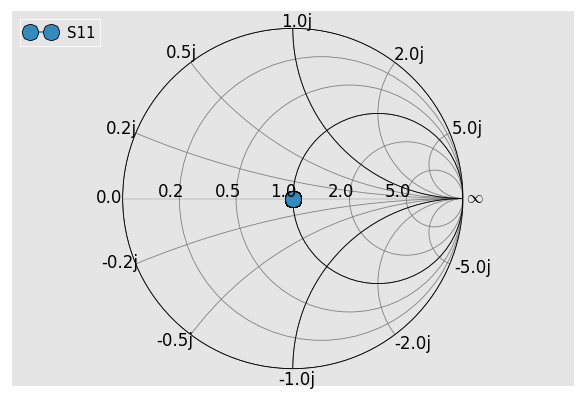

In [4]:
match_at_50.plot_s_smith(**kw)

Now, renormalize the port impedance from 50 -> 25, thus the previous 50ohm load now produces a reflection coefficient of 


$$ \Gamma^{'} = \frac{50-25}{50+25} = \frac{25}{75} = .333 $$


Plotting the renormalized response  on the Smith Chart

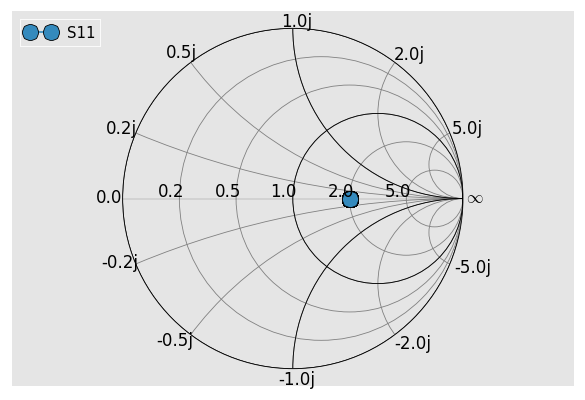

In [5]:
match_at_50.renormalize(25)
match_at_50.plot_s_smith(**kw)

You could also renormalize to a complex port impedance if you're crazy

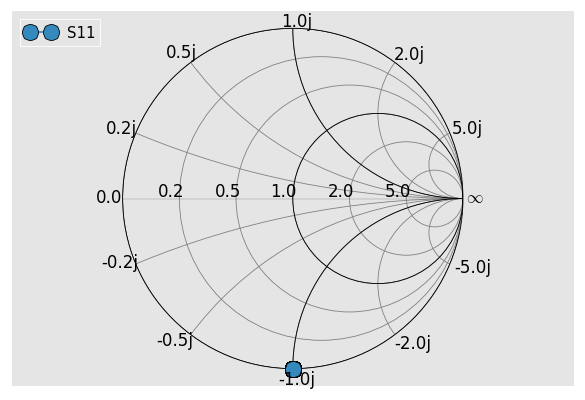

In [6]:
match_at_50 = rf.wr10.match()
match_at_50.renormalize(50j)
match_at_50.plot_s_smith(**kw)

## Complex Impedances 

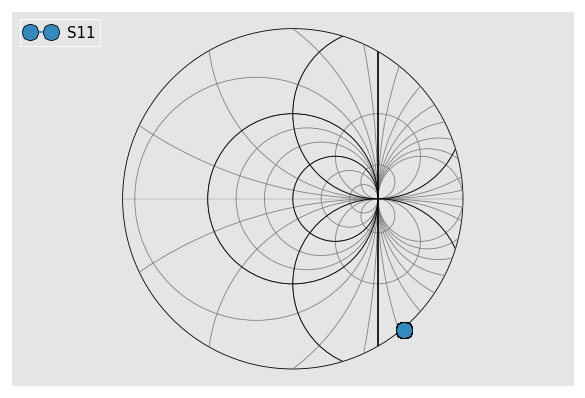

In [7]:
minusj_at_50 = rf.wr10.load(-1j, z0 = 50)
minusj_at_50.renormalize(20+20j)
minusj_at_50.plot_s_smith(r=2,**kw)


In [8]:
Zl= 1j
z0_imag,z0_real  = mgrid[-1:1:101j,-1:1:101j]
z0 = z0_real + 1j*z0_imag
s = (Zl+z0)/(Zl-z0)